# Homework 5  
Wajih Arfaoui

## Exercise 1

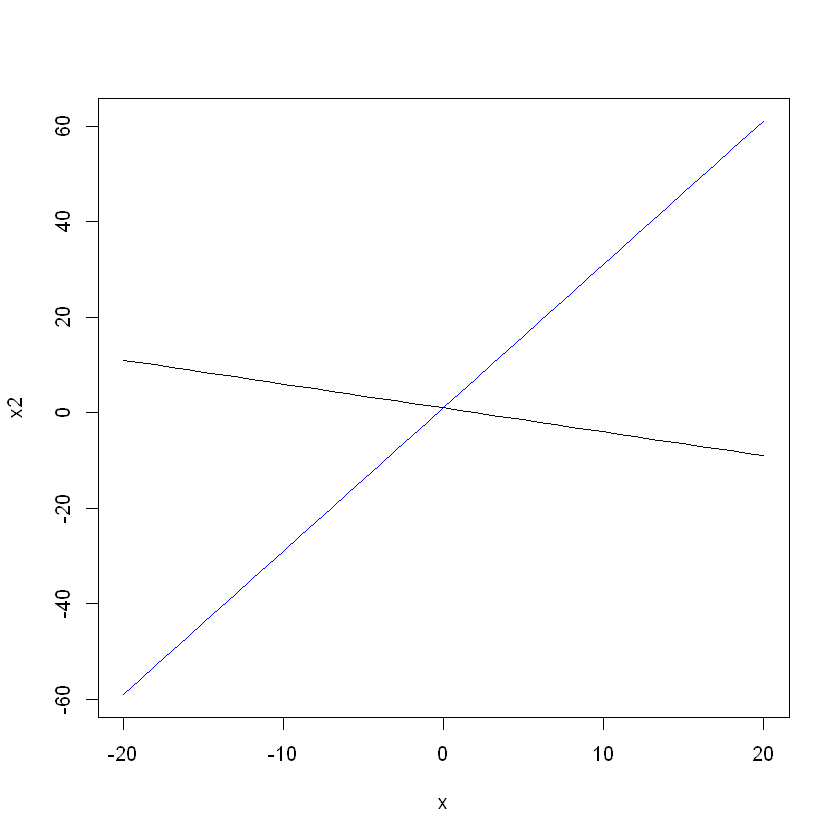

In [10]:
x = seq(-20,20)
x2 = 1 + 3*x
plot(x,x2, type="l",col="blue")
# 1 + 3*x - x2 > 0 for values under the blue line and <0 for values above the line
lines(x,1-x/2)
# -2 + x + 2*x2 > 0 for values above the black line and <0 for values under the line

## Exercise 2

$(1+x1)^2 + (2-x2)^2 = 4 $  
$= (x1-(-1))^2 + (-x2+2)^2 = 2^2$  
which means that this curve is circle with a radius 2 and center(-1,2)

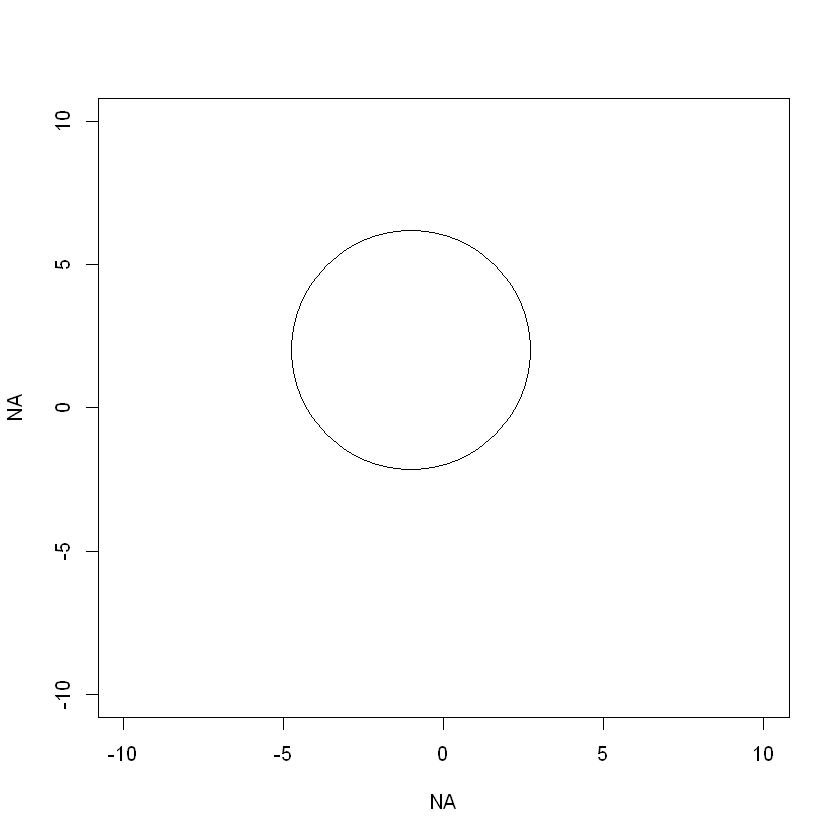

In [18]:
x1 = seq(-20,20)
x2 = seq(-20,20)
plot(NA,NA,xlim=c(-10,10), ylim=c(-10,10))
symbols(c(-1),c(2), circles=c(2), add=TRUE)

inside the circle $(1+x1)^2 + (2-x2^2) <= 4$  
outside the circle $(1+x1)^2 + (2-x2^2) > 4$

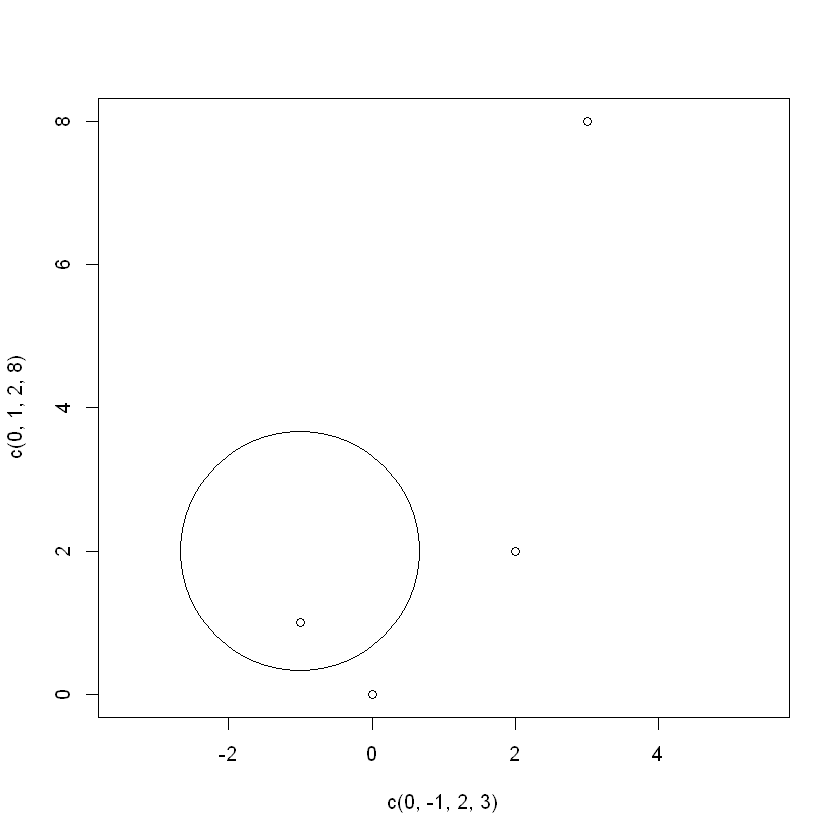

In [20]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), type = "p",asp=1)
symbols(c(-1),c(2), circles=c(2), add=TRUE)

(-1,1) red  
(0,0), (2,2) and (3,8) blue

$(1+X_1)^2 + (2-X_2)^2>4$  
$1 + 2X_1 + X_1^2$ + 4 - 4X_2 + X_2^2 >4$  
$5 + 2X_1 - 4X_2 + X_1^2 + X_2^2 >4$

## Exercise 4

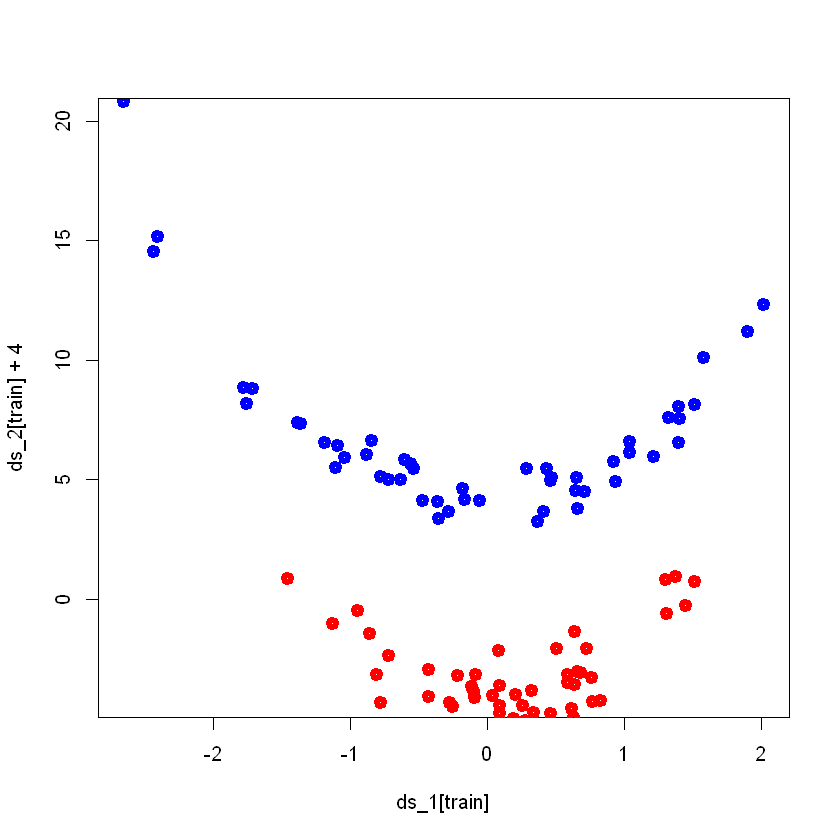

In [47]:
set.seed(42)
ds_1 = rnorm(100)
ds_2 = 2*ds_1^2 + rnorm(100)
train = sample(100,50)
plot(ds_1[train],ds_2[train]+4, lwd=5, col="blue", ylim=c(-4, 20))
points(ds_1[-train],ds_2[-train]-4,lwd=5, col="red")

In [85]:
set.seed(42)
t = rep(0, 100)
t[train] = 1
train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=ds_1[train], y=ds_2[train], t=as.factor(t[train]))
data.test = data.frame(x=ds_1[-train], y=ds_2[-train], t=as.factor(t[-train]))

In [80]:
install.packages("e1071")

Warning message:
"package 'e1071' is in use and will not be installed"


In [88]:
library(e1071)
svm.model = svm(t~., data=data.train, kernel="linear", cost=1)

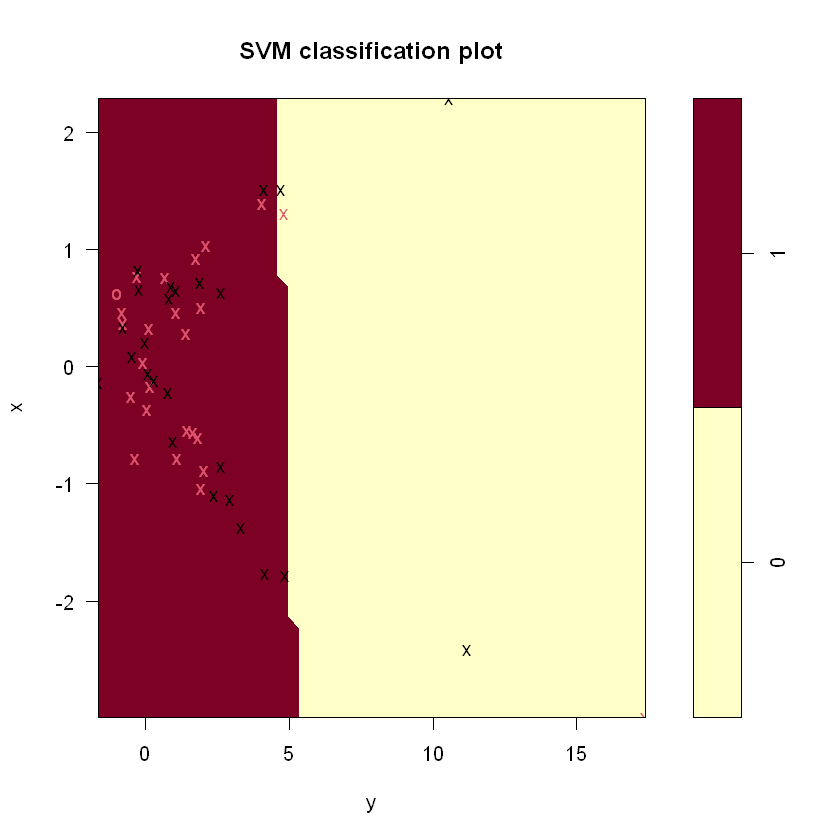

In [89]:
plot(svm.model, data.train)

In [92]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0  2 23
  1  1 24

In [93]:
svm.model = svm(t~., data=data.train, kernel="polynomial", cost=1)

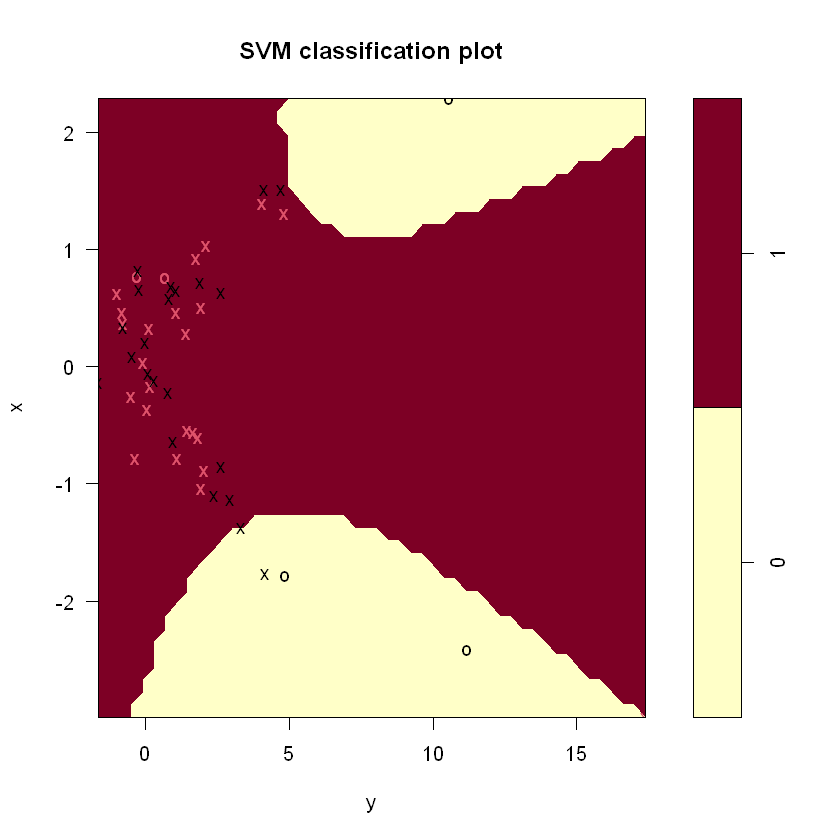

In [94]:
plot(svm.model, data.train)

In [95]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0  4 21
  1  0 25

In [108]:
svm.model = svm(t~., data=data.train, kernel="radial", gamma=1, cost=10)

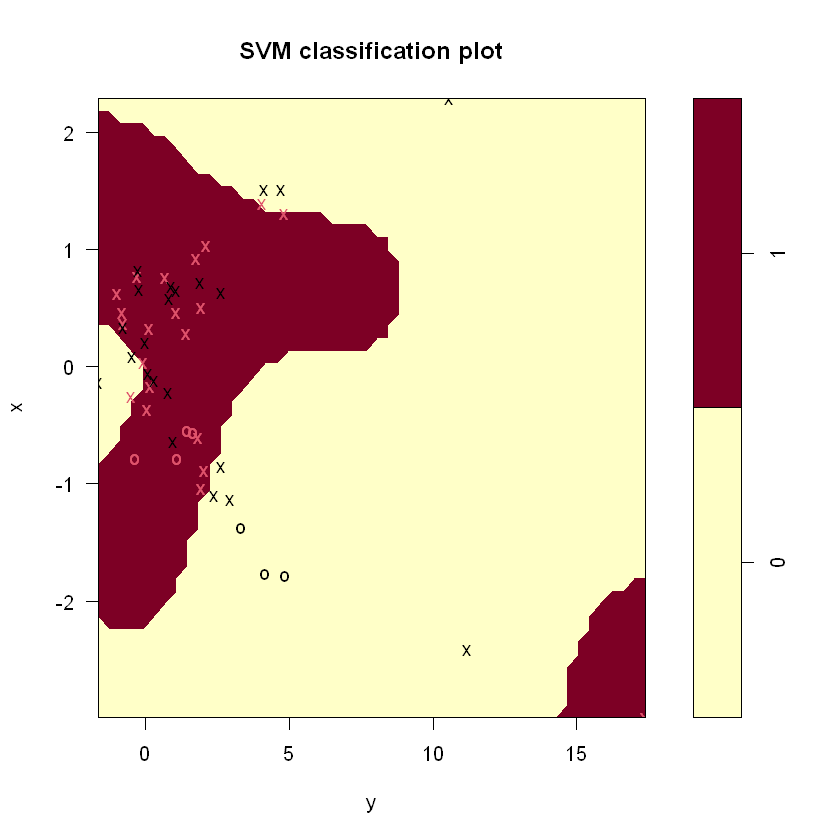

In [109]:
plot(svm.model, data.train)

In [110]:
table(t[train], predict(svm.model, data.train))

   
     0  1
  0 12 13
  1  0 25

Kernel modeloutperformed both polynomail and linear SVD

In [111]:
table(t[-train], predict(svm.model, data.test))

   
     0  1
  0  8 17
  1  5 20

## Exercise 8

In [116]:
library(ISLR)
set.seed(42)
split = sample(dim(OJ)[1], 800)
train = OJ[split, ]
test = OJ[-split, ]

In [117]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = train, cost = 0.01)

In [118]:
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  432

 ( 215 217 )


Number of Classes:  2 

Levels: 
 CH MM




215 support vectors belong to level CH and 217 belong to level MM.

In [119]:
train.pred = predict(svm.linear, train)
table(train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 432  60
  MM  77 231

In [120]:
(77+60)/(432+60+77+231)

[1] 0.17125

In [121]:
test.pred = predict(svm.linear, test)
table(test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 142  19
  MM  25  84

In [122]:
(25+19)/(142+19+25+84)

[1] 0.162963

In [133]:
tu = tune(svm, Purchase ~ ., data = train, kernel = "linear", ranges = list(cost = seq(0.01, 10, by = 0.5)))
summary(tu)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 2.51

- best performance: 0.17375 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.17875 0.05834821
2  0.51 0.18125 0.05344065
3  1.01 0.17625 0.04875178
4  1.51 0.17750 0.05296750
5  2.01 0.17500 0.04823265
6  2.51 0.17375 0.05015601
7  3.01 0.17500 0.04823265
8  3.51 0.17375 0.05185785
9  4.01 0.17500 0.05237419
10 4.51 0.17500 0.05000000
11 5.01 0.18000 0.04830459
12 5.51 0.18000 0.04830459
13 6.01 0.18000 0.04830459
14 6.51 0.18000 0.04830459
15 7.01 0.18250 0.04866267
16 7.51 0.18375 0.04931827
17 8.01 0.18250 0.04830459
18 8.51 0.18250 0.04830459
19 9.01 0.18125 0.04938862
20 9.51 0.18000 0.05109903


In [134]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = train, cost = 2.51)
train.pred = predict(svm.linear, train)
table(train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 435  57
  MM  76 232

In [135]:
(76+57)/(435+232)

[1] 0.1994003

In [136]:
test.pred = predict(svm.linear, test)
table(test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 140  21
  MM  24  85

In [137]:
(24+21)/(140+21+24+85)

[1] 0.1666667

In [138]:
svm.radial = svm(Purchase ~ ., data = train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  375

 ( 183 192 )


Number of Classes:  2 

Levels: 
 CH MM




In [139]:
train.pred = predict(svm.radial, train)
table(train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 453  39
  MM  81 227

In [140]:
(81+39)/(453+39+81+227)

[1] 0.15

In [141]:
test.pred = predict(svm.radial, test)
table(test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  15
  MM  28  81

In [142]:
(28+15)/(146+15+28+81)

[1] 0.1592593

In [143]:
tu = tune(svm, Purchase ~ ., data = train, kernel = "radial", ranges = list(cost = seq(0.01, 10, by = 0.5)))
summary(tu)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.51

- best performance: 0.175 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.38500 0.05489890
2  0.51 0.17500 0.04602234
3  1.01 0.17750 0.04851976
4  1.51 0.17625 0.04767147
5  2.01 0.17625 0.05050096
6  2.51 0.17500 0.05335937
7  3.01 0.17750 0.05096295
8  3.51 0.18000 0.04830459
9  4.01 0.18125 0.04903584
10 4.51 0.18250 0.04901814
11 5.01 0.18125 0.05008673
12 5.51 0.18250 0.04794383
13 6.01 0.18500 0.04887626
14 6.51 0.18625 0.04980866
15 7.01 0.18750 0.04965156
16 7.51 0.18625 0.04945888
17 8.01 0.18625 0.04980866
18 8.51 0.18500 0.04993051
19 9.01 0.18500 0.04993051
20 9.51 0.18500 0.04993051


In [144]:
svm.radial = svm(Purchase ~ ., data = train, kernel = "radial", cost = 0.51)
train.pred = predict(svm.radial, train)
table(train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 451  41
  MM  80 228

In [145]:
(80+41)/(451+41+80+228)

[1] 0.15125

In [146]:
test.pred = predict(svm.radial, test)
table(test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 145  16
  MM  28  81

In [147]:
(28+16)/(145+16+28+81)

[1] 0.162963